# Data analysis of the data regularite-mensuelle-ter

We propose a visualtion and analysis of the data set regularite-mensuelle-ter, found on the SNCF opendata website.

In [19]:
#Loading packages
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

In [20]:
#Importing the dataset

url = "https://ressources.data.sncf.com/api/explore/v2.1/catalog/datasets/regularite-mensuelle-ter/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"
df = pd.read_csv(url, sep=";", header=0)


## Data description/visualization

Data found on the SNCF open data website : https://ressources.data.sncf.com/explore/dataset/regularite-mensuelle-ter/information/?sort=nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJzcGxpbmUiLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJ0YXV4X2RlX3JlZ3VsYXJpdGUiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiIjMDA4OENFIn1dLCJ4QXhpcyI6ImRhdGUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJtb250aCIsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6InJlZ3VsYXJpdGUtbWVuc3VlbGxlLXRlciIsIm9wdGlvbnMiOnsic29ydCI6Im5vbWJyZV9kZV90cmFpbnNfYV9sX2hldXJlX3BvdXJfdW5fdHJhaW5fZW5fcmV0YXJkX2FfbF9hcnJpdmVlIn19fV0sImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9

Explanation for the variables : 

Régions : the region the data is coming from // discrete qualitative variable

Nombre de trains programmés : number of trains that were scheduled to run // discrete quantitative variable 

Nombre de trains ayant circulé : trains that effectively ran // discrete quantitative variable 

Nombre de trains annulés : canceled trains - according to the website, a train is considered canceled when the announcement of its removal was made after 16h the day prior its scheduled travel // discrete quantitative variable 

Nombre de trains en retard à l'arrivée  : late trains - a train is considered to be late if it arrives 5 minutes after the scheduled time // discrete variable 

Taux de régularité : regularity rate, computed based on the regular and late trains // continuous quantitative variable

Nombre de trains à l'heure pour un train en retard à l'arrivée : proportion of trains on time per one late // continuous quantitative variable

In [28]:
#Checking for missing values : there is not much 
print(df.isna().sum())
df_missing_values = df[df.iloc[:,2].isna()]
df_missing_values
print(f"\nNumber of NaN values for the 3rd column : {df_missing_values.shape[0]}") #We can see the 37 NaN of each variables correspond to the same 37 rows 
print(f"\nExplanation: \n{df_missing_values['Commentaires'].head(1)}") #We have an explanation here

Date                                                                 0
Région                                                               0
Nombre de trains programmés                                         37
Nombre de trains ayant circulé                                      37
Nombre de trains annulés                                            37
Nombre de trains en retard à l'arrivée                              37
Taux de régularité                                                  37
Nombre de trains à l'heure pour un train en retard à l'arrivée      37
Commentaires                                                      1300
dtype: int64

Number of NaN values for the 3rd column : 37

Explanation: 
25    Le Président de la Région Lorraine s'est oppos...
Name: Commentaires, dtype: object


In [29]:
#Let's remove the missing values ! 
df = df.dropna(subset=df.columns[2:6])
print(df.isna().sum())   #Cheking it worked

Date                                                                 0
Région                                                               0
Nombre de trains programmés                                          0
Nombre de trains ayant circulé                                       0
Nombre de trains annulés                                             0
Nombre de trains en retard à l'arrivée                               0
Taux de régularité                                                   0
Nombre de trains à l'heure pour un train en retard à l'arrivée       0
Commentaires                                                      1298
dtype: int64


In [30]:
#We can convert some data types
df["Nombre de trains programmés"] = df["Nombre de trains programmés"].astype(int)
df["Nombre de trains ayant circulé"] = df["Nombre de trains ayant circulé"].astype(int)
df["Nombre de trains annulés"] = df["Nombre de trains annulés"].astype(int)
df["Nombre de trains en retard à l'arrivée"] = df["Nombre de trains en retard à l'arrivée"].astype(int)

df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m").dt.to_period("M")

df.dtypes

Date                                                              period[M]
Région                                                               object
Nombre de trains programmés                                           int64
Nombre de trains ayant circulé                                        int64
Nombre de trains annulés                                              int64
Nombre de trains en retard à l'arrivée                                int64
Taux de régularité                                                  float64
Nombre de trains à l'heure pour un train en retard à l'arrivée      float64
Commentaires                                                         object
dtype: object

In [32]:
#Get a glimpse of our data
df.head()

,Date,Région,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée,Commentaires
0,2013-01,Alsace,20095,19874,221,897,95.486565,21.156076,Intempéries.
1,2013-01,Centre,9882,9687,195,812,91.617632,10.929803,"Trois incidents caténaires lourds, dont deux p..."
2,2013-01,Haute Normandie,5957,5878,79,488,91.697856,11.045082,Episodes neigeux et difficultés matériels.
3,2013-01,Pays-de-la-Loire,10407,10195,212,713,93.006376,13.298738,NaN
4,2013-02,Aquitaine,7926,7832,94,912,88.355465,7.587719,Inondations au sud de Dax du 11 au 13 février.


In [33]:
#Some usual descriptive stats
round(df.describe(), 2)

,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée
count,2189.00,2189.00,2189.00,2189.00,2189.00,2189.00
mean,13348.44,13070.63,291.64,1106.00,91.53,12.83
std,9793.38,9572.27,314.15,896.34,3.33,5.96
min,1129.00,1125.00,4.00,35.00,74.37,2.90
25%,6900.00,6758.00,91.00,465.00,89.65,8.66
50%,10373.00,10182.00,179.00,799.00,91.95,11.42
75%,15386.00,15067.00,383.00,1432.00,94.01,15.71
max,47825.00,46865.00,4024.00,5250.00,98.03,49.67


We now try to visualize data in general : the different variables per month, throughout all regions

In [34]:
#Plotting the number of scheduled trains

#We do this to get the total number of programmed trains for each month, with the function groupby
total_prog_train = df.groupby(by="Date").agg(total_prog_train = ("Nombre de trains programmés", "sum"))
total_circ = df.groupby(by="Date").agg(total_circ = ("Nombre de trains ayant circulé", "sum")) #same for trains that actually ran

#The time period for our data
period = total_prog_train.index        #the index of the new data is the time period
period = period.to_timestamp()

total_prog_train

,total_prog_train
Date,
2013-01,189899
2013-02,171409
2013-03,182332
2013-04,177483
2013-05,177082
...,...
2025-05,219187
2025-06,224385
2025-07,220646


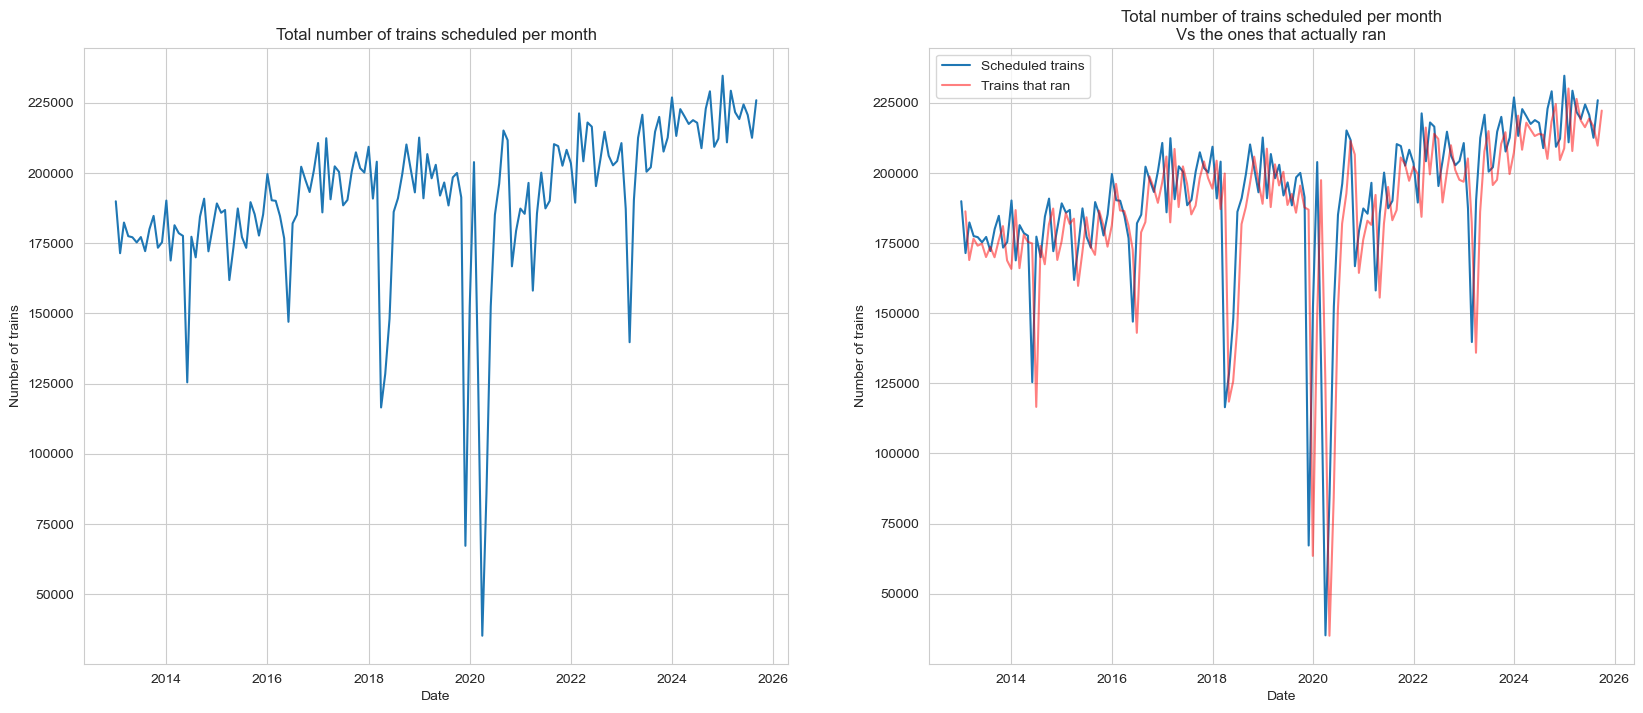

In [35]:
#The plotting
#Interesting to see the covid drop in 2020
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].plot(period, total_prog_train)
ax[0].set_title("Total number of trains scheduled per month")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of trains")

ax[1].plot(period, total_prog_train, label = "Scheduled trains")
ax[1].plot(total_circ, color = "red", alpha=0.5, label = "Trains that ran")
ax[1].set_title("Total number of trains scheduled per month\nVs the ones that actually ran")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of trains")
ax[1].legend()

Text(0, 0.5, 'Number of trains')

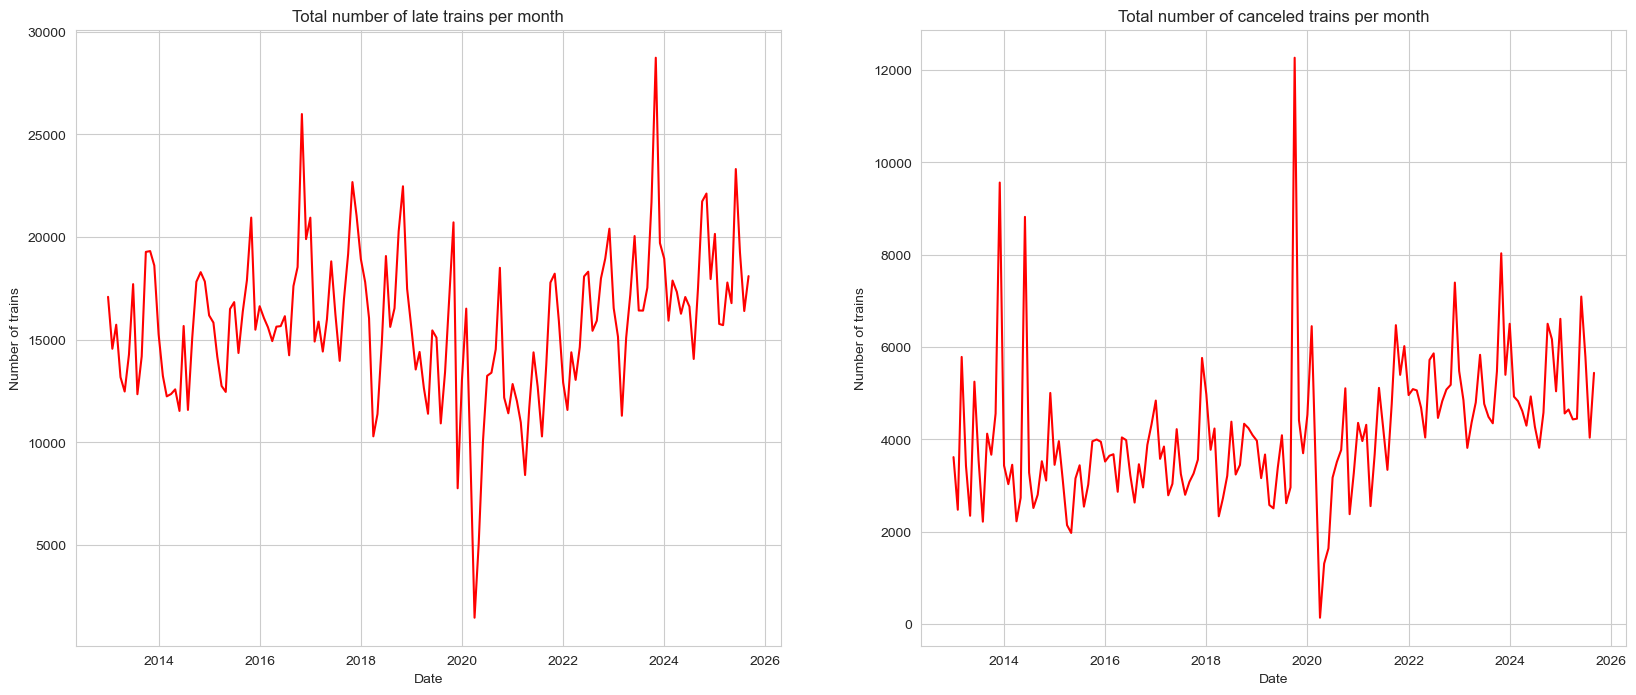

In [36]:
#Plotting the number of canceled of late trains

#Getting the data together again
late_trains = df.groupby(by="Date").agg(late_trains = ("Nombre de trains en retard à l'arrivée", "sum"))
cancel_trains = df.groupby(by="Date").agg(cancel_trains = ("Nombre de trains annulés", "sum"))

#The plotting
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(period, late_trains, color = "red")
ax[0].set_title("Total number of late trains per month")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of trains")

ax[1].plot(period, cancel_trains, color = "red")
ax[1].set_title("Total number of canceled trains per month")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of trains")

Text(0, 0.5, 'Number of trains')

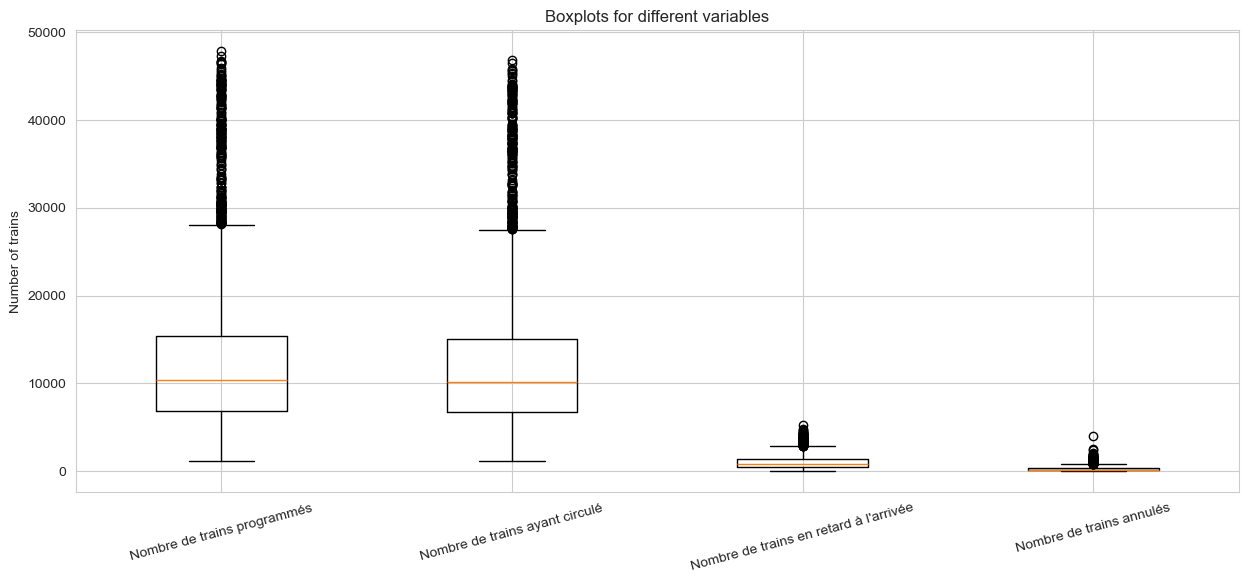

In [37]:
#Boxplots can also be good representation to get an idea of the variables
plt.figure(figsize=(15,6))
plt.boxplot(df[["Nombre de trains programmés", "Nombre de trains ayant circulé", "Nombre de trains en retard à l'arrivée", "Nombre de trains annulés"]])
plt.title("Boxplots for different variables")
plt.xticks(ticks=[1, 2, 3, 4], 
           labels=["Nombre de trains programmés", 
                   "Nombre de trains ayant circulé", 
                   "Nombre de trains en retard à l'arrivée", 
                   "Nombre de trains annulés"],
           rotation=15)
plt.ylabel("Number of trains")


Text(0, 0.5, 'Number of trains')

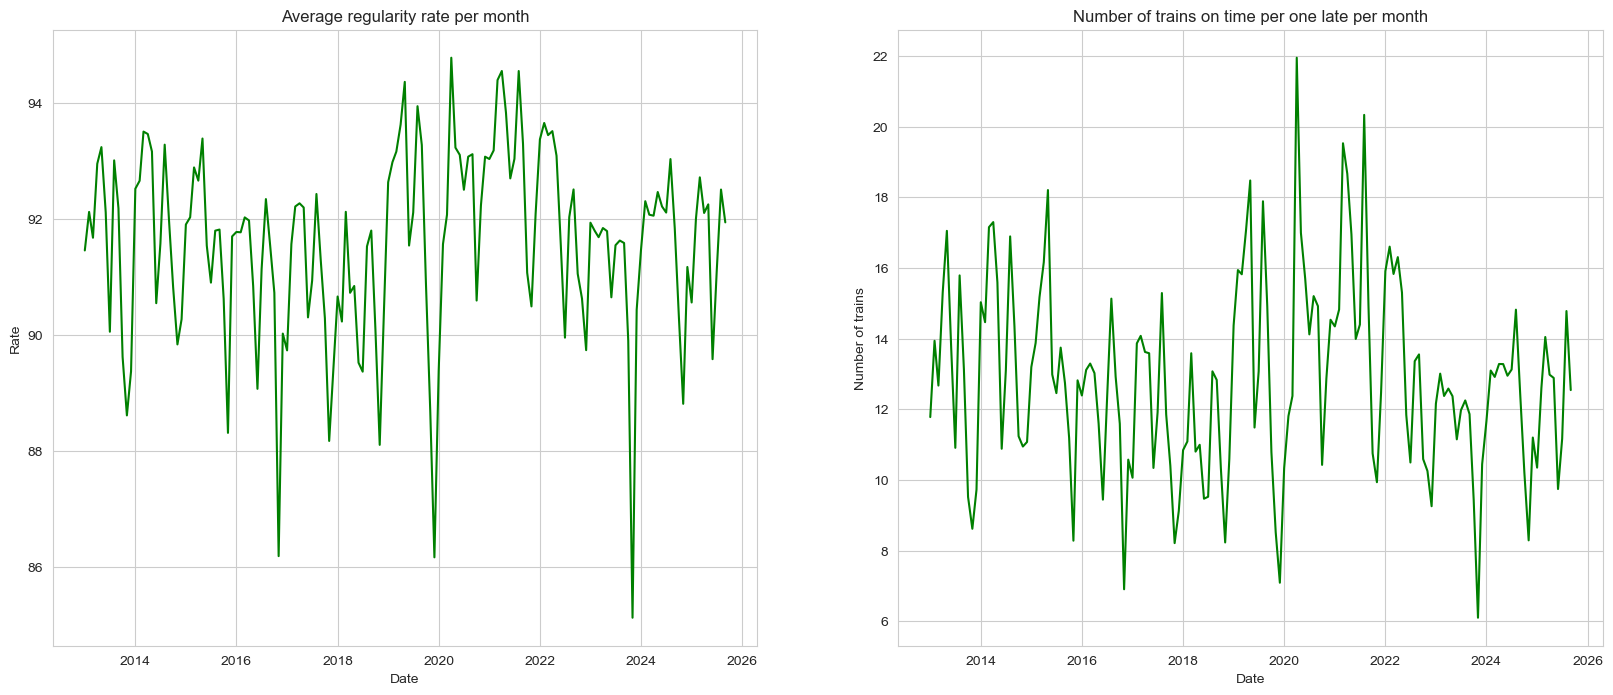

In [38]:
#Plotting the average regularity rate and number of trains on time per one late

#Getting the data together again
reg_rate = df.groupby(by="Date").agg(reg_rate = ("Taux de régularité", "mean"))     #We have to do the mean here, not the sum !
prop = df.groupby(by="Date").agg(prop = ("Nombre de trains à l'heure pour un train en retard à l'arrivée", "mean"))

fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(period, reg_rate, color = "green")
ax[0].set_title("Average regularity rate per month")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Rate")

ax[1].plot(period, prop, color = "green")
ax[1].set_title("Number of trains on time per one late per month")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of trains")

Text(0, 0.5, 'Rate')

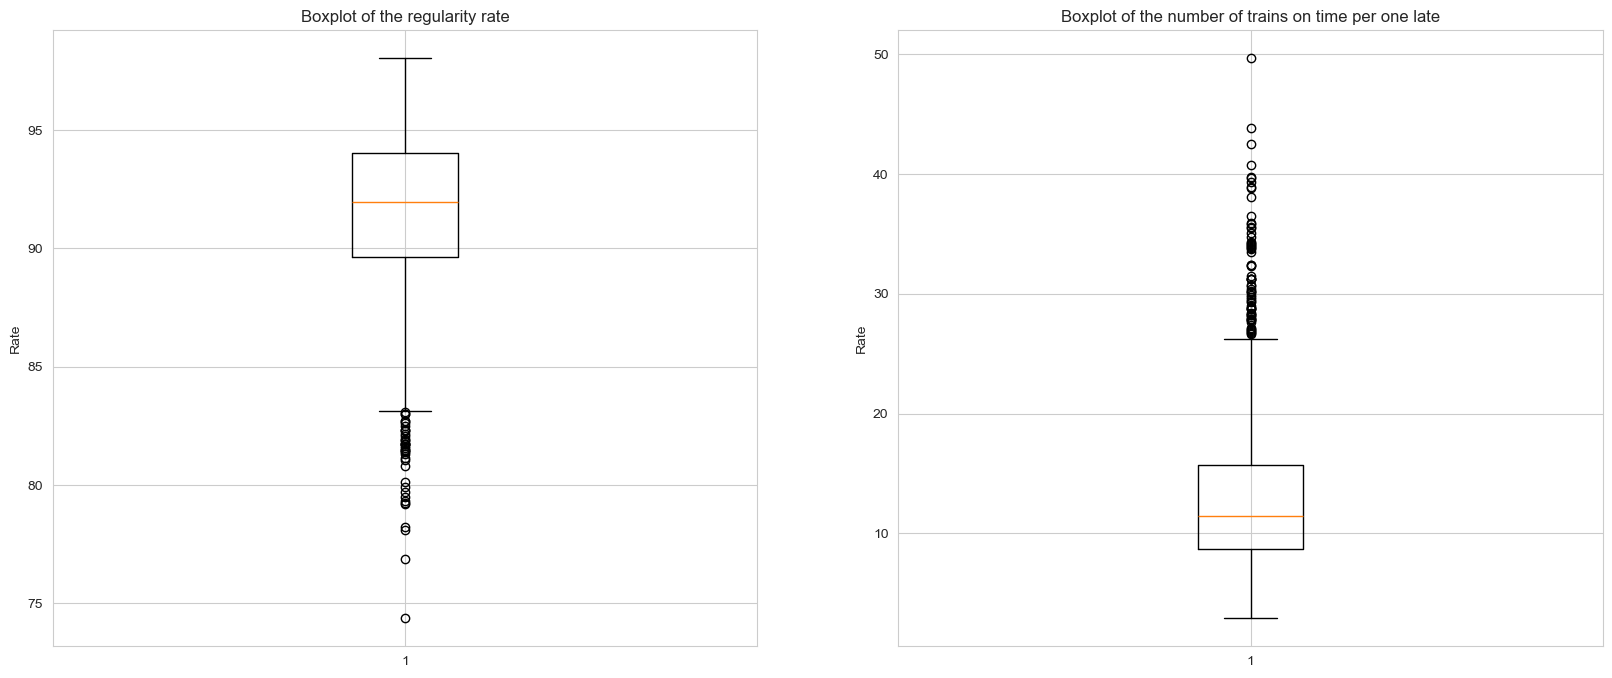

In [39]:
#The boxplots
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].boxplot(df["Taux de régularité"])
ax[0].set_title("Boxplot of the regularity rate")
ax[0].set_ylabel("Rate")

ax[1].boxplot(df["Nombre de trains à l\'heure pour un train en retard à l\'arrivée"])
ax[1].set_title("Boxplot of the number of trains on time per one late")
ax[1].set_ylabel("Rate")


After getting a global first glance of the data, we could be more specific : visualize per region for instance 

In [40]:
#How many different regions are registered? => We count 28
df["Région"].value_counts()

Région
Pays-de-la-Loire              153
Bretagne                      153
Provence Alpes Côte d'Azur    153
Grand Est                     105
Auvergne-Rhône-Alpes           93
Hauts-de-France                93
Bourgogne-Franche-Comté        93
Normandie                      93
Aquitaine                      92
Centre                         92
Occitanie                      87
Midi Pyrénées                  66
Centre Val-de-Loire            61
Nouvelle Aquitaine             61
Basse Normandie                60
Limousin                       60
Auvergne                       60
Poitou Charentes               60
Rhône Alpes                    60
Picardie                       60
Languedoc Roussillon           60
Franche Comté                  60
Bourgogne                      60
Haute Normandie                60
Nord Pas de Calais             58
Alsace                         48
Champagne Ardenne              48
Lorraine                       13
Sud Azur                        9
Etoile 

In [41]:
#Making different dataframes
df_pays_de_la_loire = df[df["Région"]=="Pays-de-la-Loire"]
df_paca = df[df["Région"]=="Provence Alpes Côte d\'Azur"]
df_bretagne = df[df["Région"] == "Bretagne"]
df_grand_est = df[df["Région"] == "Grand Est"]
df_centre = df[df["Région"] == "Centre"]
df_aquitaine = df[df["Région"] == "Aquitaine"]
df_normandie = df[df["Région"] == "Normandie"]
df_hauts_de_france = df[df["Région"] == "Hauts-de-France"]
df_auvergne_rhone_alpes = df[df["Région"] == "Auvergne-Rhône-Alpes"]
df_bourgogne_franche_comte = df[df["Région"] == "Bourgogne-Franche-Comté"]
df_occitanie = df[df["Région"] == "Occitanie"]
df_midi_pyrenees = df[df["Région"] == "Midi Pyrénées"]
df_rhone_alpes = df[df["Région"] == "Rhône Alpes"]
df_picardie = df[df["Région"] == "Picardie"]
df_bourgogne = df[df["Région"] == "Bourgogne"]
df_franche_comte = df[df["Région"] == "Franche Comté"]
df_basse_normandie = df[df["Région"] == "Basse Normandie"]
df_haute_normandie = df[df["Région"] == "Haute Normandie"]
df_auvergne = df[df["Région"] == "Auvergne"]
df_languedoc_roussillon = df[df["Région"] == "Languedoc Roussillon"]
df_limousin = df[df["Région"] == "Limousin"]
df_poitou_charentes = df[df["Région"] == "Poitou Charentes"]
df_nord_pas_de_calais = df[df["Région"] == "Nord Pas de Calais"]
df_nouvelle_aquitaine = df[df["Région"] == "Nouvelle Aquitaine"]
df_centre_val_de_loire = df[df["Région"] == "Centre Val-de-Loire"]
df_champagne_ardenne = df[df["Région"] == "Champagne Ardenne"]
df_alsace = df[df["Région"] == "Alsace"]
df_lorraine = df[df["Région"] == "Lorraine"]

### PACA REGION
Following this, we will be focusing on only one region for simplicity. We choose paca because there are the most data in there

In [42]:
#Curating the data
df_paca = df[df["Région"]=="Provence Alpes Côte d\'Azur"]
df_paca = df_paca.reset_index()  #we want a proper index
df_paca = df_paca.drop(["index", "Région"], axis=1)  #we already know its the paca region and the column becomes redundant
df_paca.head()

,Date,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée,Commentaires
0,2013-02,12581,12142,439,1761,85.496623,5.894946,NaN
1,2013-04,13437,12168,1269,1660,86.357659,6.330120,Un éboulement dans un tunnel suite à des intem...
2,2013-10,11011,10306,705,2382,76.887250,3.326616,Mouvement social interprofessionnel.
3,2013-12,14882,10858,4024,2016,81.433045,4.385913,Prolongation de la fermeture de la ligne Aspre...
4,2014-06,9834,9430,404,1630,82.714740,4.785276,La reprise du mouvement social occasionne des ...


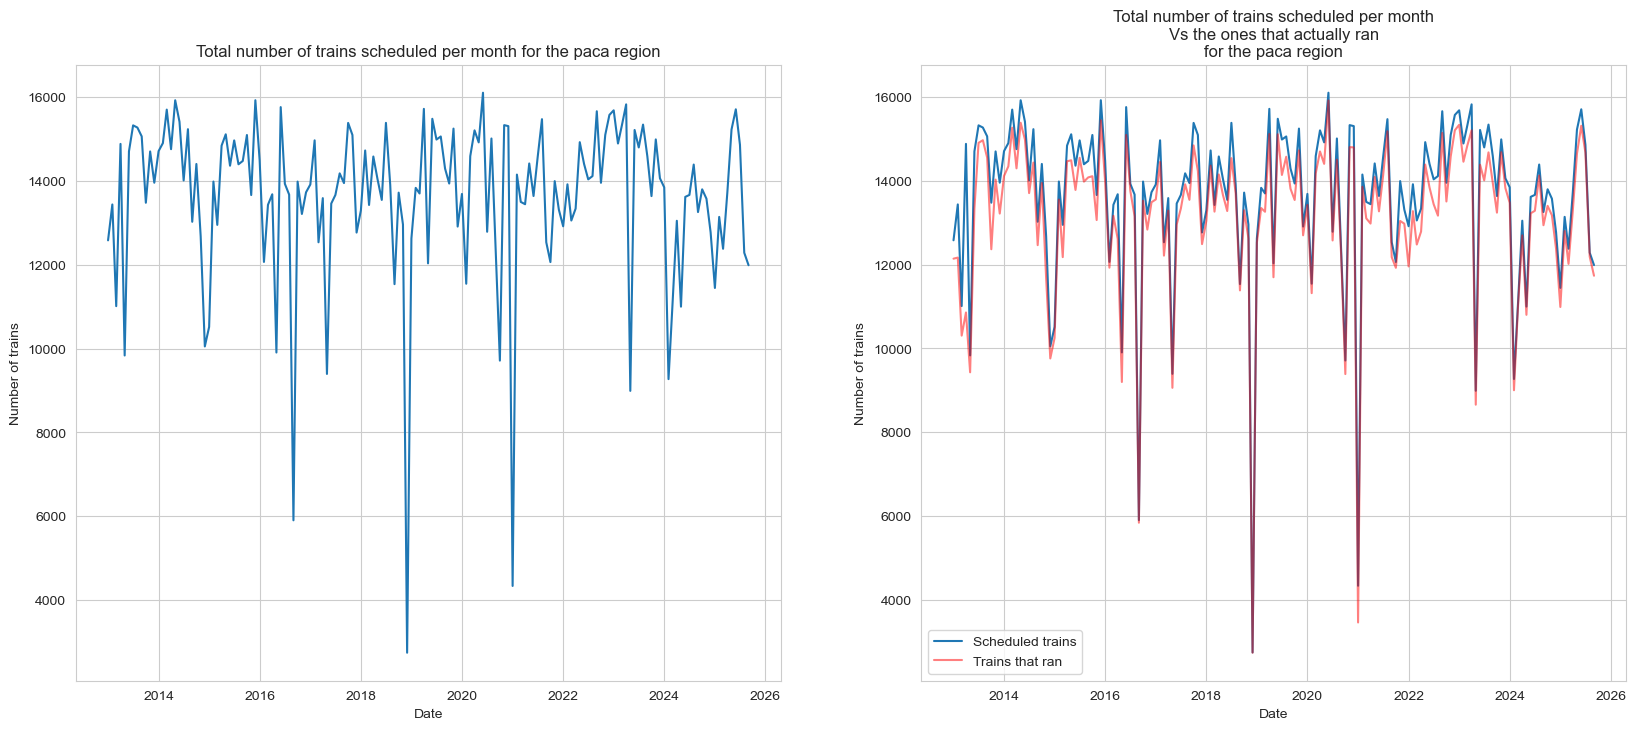

In [43]:
#Here we have a graph, followed by a plot for each of the 6 variables of interest for the paca region
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].plot(period, df_paca.iloc[:,1])
ax[0].set_title("Total number of trains scheduled per month for the paca region")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of trains")

ax[1].plot(period, df_paca.iloc[:,1], label = "Scheduled trains")
ax[1].plot(period, df_paca.iloc[:,2], color = "red", alpha=0.5, label = "Trains that ran")
ax[1].set_title("Total number of trains scheduled per month\nVs the ones that actually ran\nfor the paca region")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of trains")
ax[1].legend()

Text(0, 0.5, 'Number of trains')

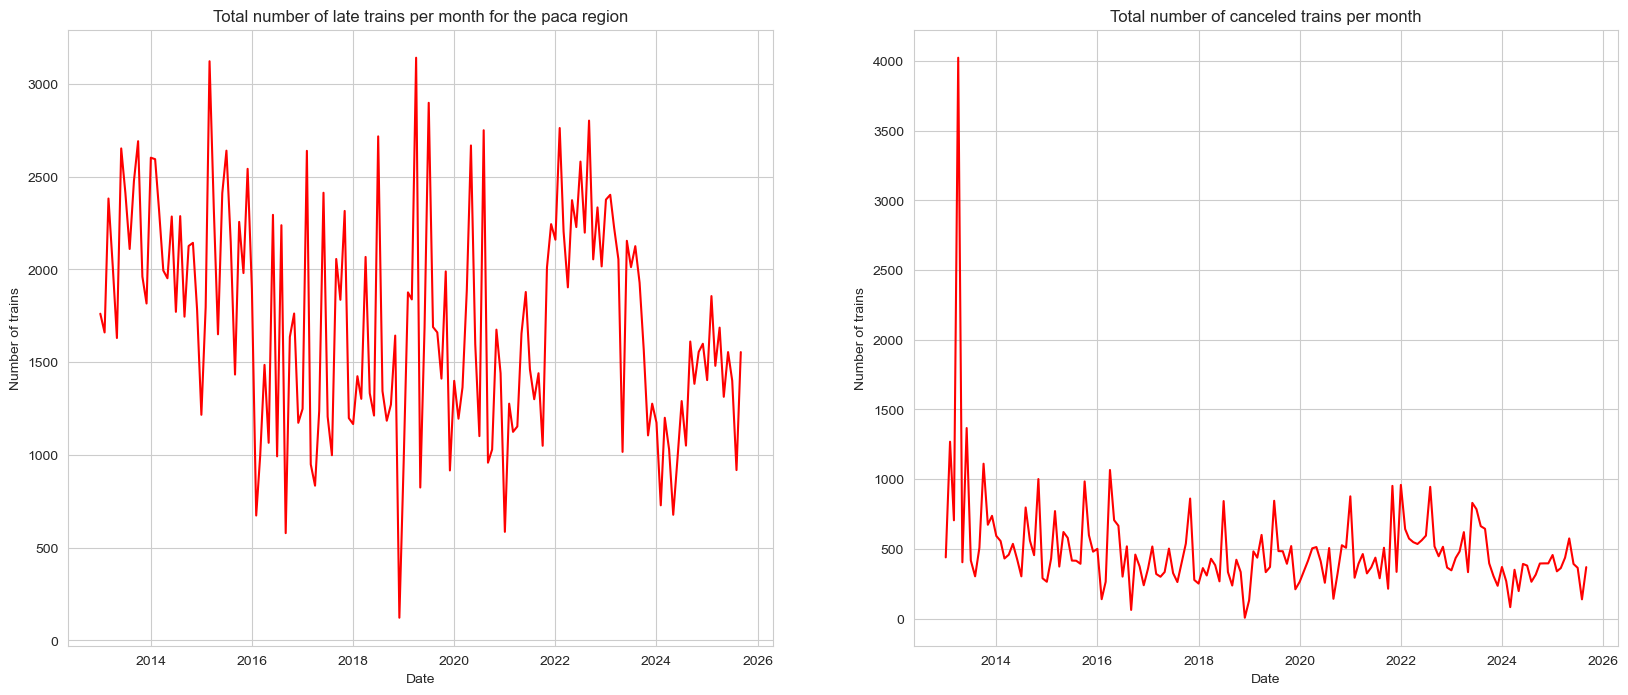

In [44]:
#The plotting
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(period, df_paca.iloc[:,4], color = "red")
ax[0].set_title("Total number of late trains per month for the paca region")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of trains")

ax[1].plot(period, df_paca.iloc[:,3], color = "red")
ax[1].set_title("Total number of canceled trains per month")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of trains")

Text(0, 0.5, 'Number of trains')

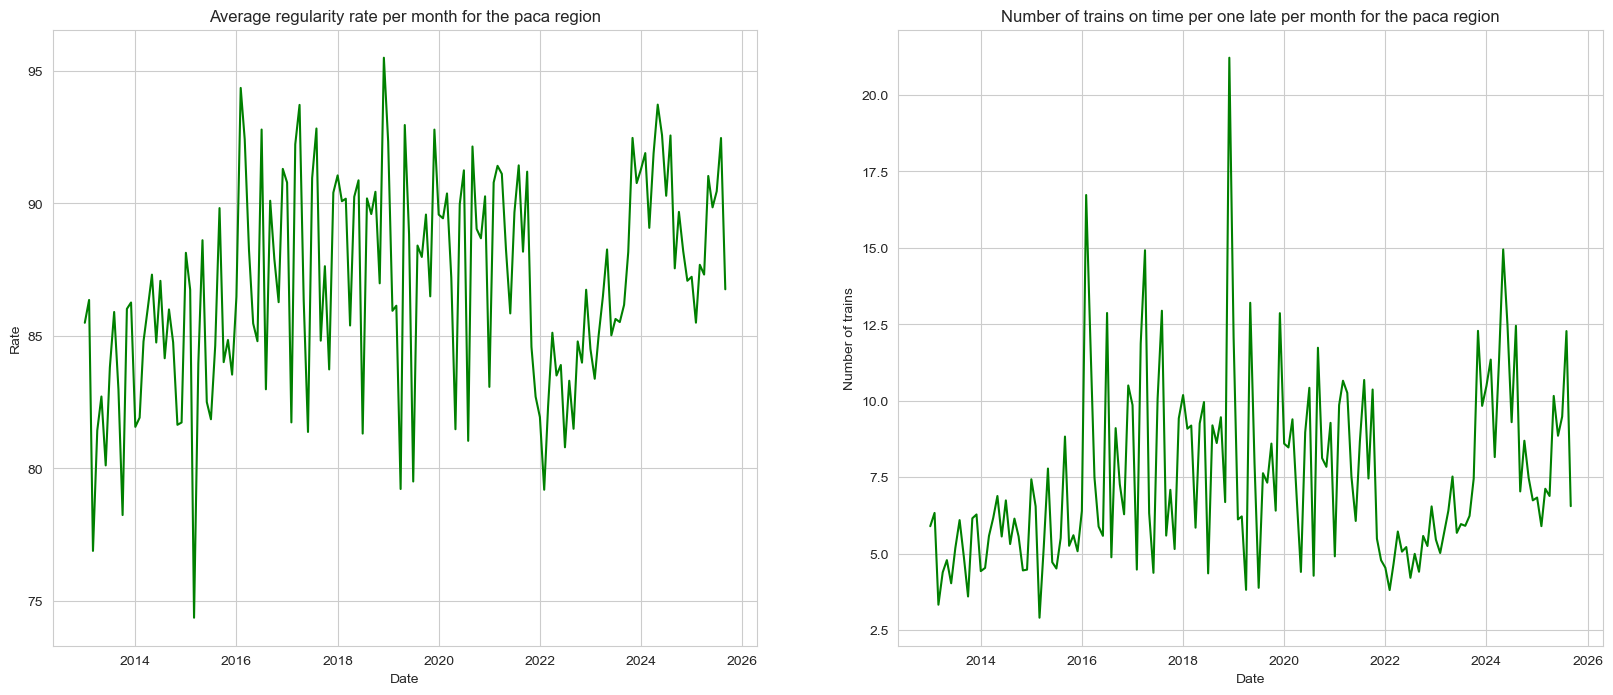

In [45]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(period, df_paca.iloc[:,5], color = "green")
ax[0].set_title("Average regularity rate per month for the paca region")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Rate")

ax[1].plot(period, df_paca.iloc[:,6], color = "green")
ax[1].set_title("Number of trains on time per one late per month for the paca region")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Number of trains")

It could be intersesting to isolate the data where the late or canceled train were particularly numerous

,Date,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée,Commentaires
26,2014-11,12950,12179,771,3122,74.365711,2.901025,La production est confrontée à de fortes intem...
66,2015-01,15384,14541,843,2717,81.314903,4.351859,NaN
75,2015-07,15718,15118,600,3141,79.223442,3.813117,NaN
78,2015-10,14986,14141,845,2898,79.506400,3.879572,Aux difficultés de production liées au manque ...
91,2017-11,15011,14505,506,2750,81.041020,4.274545,La chute de nos résultats s'explique par des d...
109,2013-07,13918,13276,642,2762,79.195541,3.806662,NaN
116,2015-08,15661,15143,518,2802,81.496401,4.404354,NaN


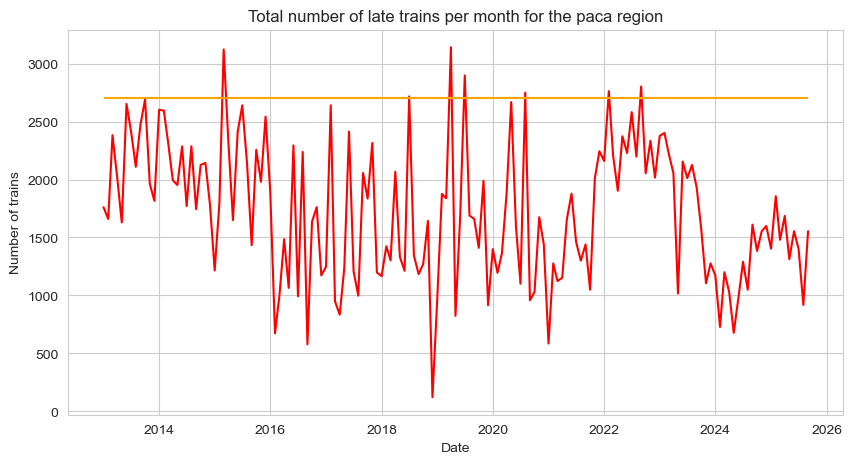

In [46]:
#let's set a threshold
plt.figure(figsize=(10,5))
plt.plot(period, df_paca.iloc[:,4], color = "red")
plt.hlines(2700, xmin=period.min(), xmax=period.max(), color="orange")  #Set the threshold at 2700 late trains in a month
plt.title("Total number of late trains per month for the paca region")
plt.xlabel("Date")
plt.ylabel("Number of trains")

df_paca[df_paca["Nombre de trains en retard à l\'arrivée"]>=2700]  #7 months during which the late trains were above 2700 ; in the entire period of the data set

## Data analysis

Text(0, 0.5, 'Number of trains')

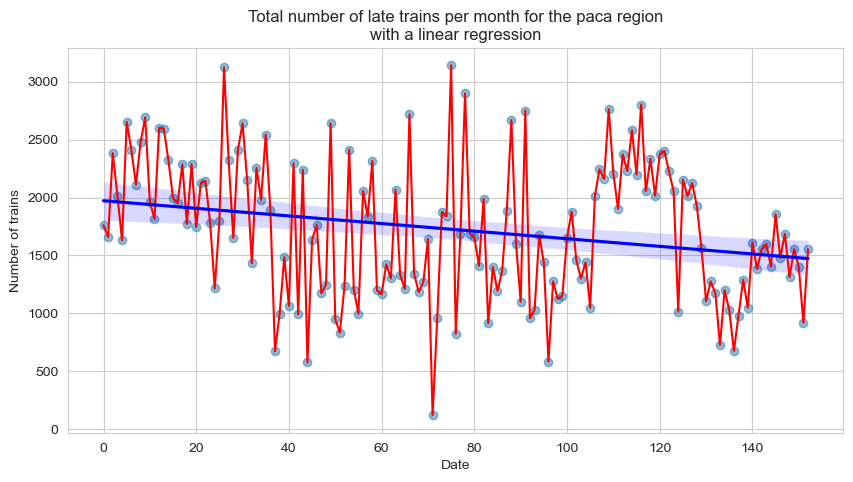

In [47]:
#We could be tempted to perform a linear regression, to observe in which direction the evolution of late train is going
# => here we observe that slowly, but surely, it is going down! That's good news // To take carefuly though, as we can see the high portion of the confidence interval is flat/almost rising
plt.figure(figsize=(10,5))
plt.plot(df_paca.index, df_paca.iloc[:,4], color = "red")
sns.regplot(x=df_paca.index, y=df_paca.iloc[:,4], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title("Total number of late trains per month for the paca region\nwith a linear regression")
plt.xlabel("Date")
plt.ylabel("Number of trains")

,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée
Nombre de trains programmés,1.000000,0.999691,0.748919,0.830218,-0.007195,-0.012397
Nombre de trains ayant circulé,0.999691,1.000000,0.734714,0.825625,0.002068,-0.004644
Nombre de trains annulés,0.748919,0.734714,1.000000,0.757315,-0.282875,-0.244700
Nombre de trains en retard à l'arrivée,0.830218,0.825625,0.757315,1.000000,-0.471060,-0.418769
Taux de régularité,-0.007195,0.002068,-0.282875,-0.471060,1.000000,0.867153
Nombre de trains à l'heure pour un train en retard à l'arrivée,-0.012397,-0.004644,-0.244700,-0.418769,0.867153,1.000000


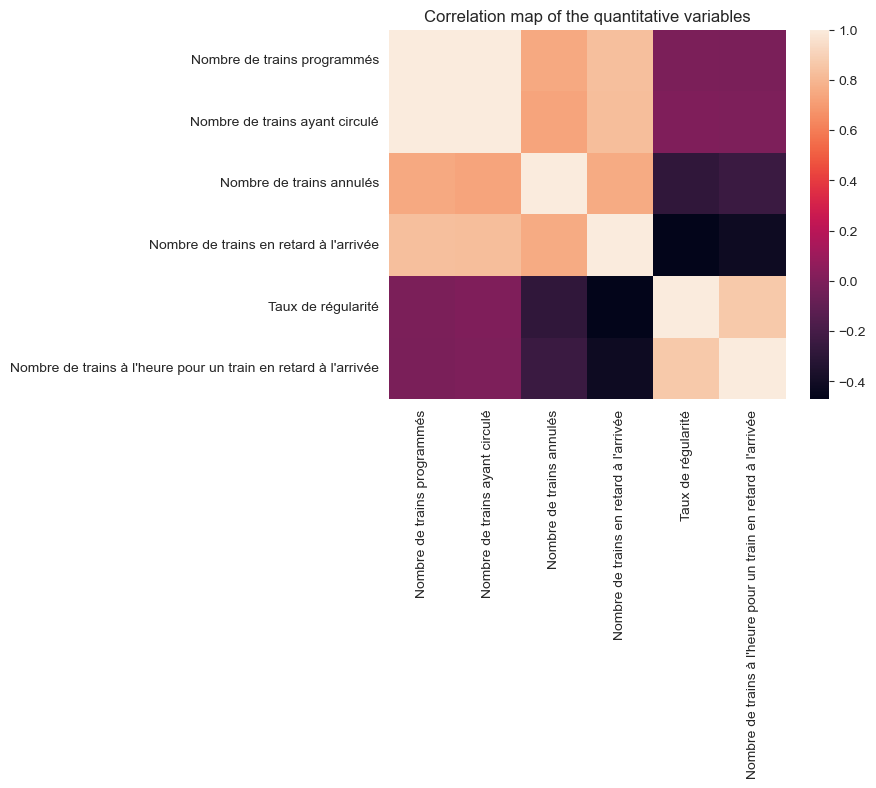

In [48]:
#It could be interesting to see if there was a correlation between the number of trains that were initially sheculed with the number of trains that were late
#In order to visualize this, let's use a Pearson's correlation matrix

corr_mat = df.drop(["Date", "Région", "Commentaires"], axis=1).corr()

sns.heatmap(corr_mat)
plt.title("Correlation map of the quantitative variables")

corr_mat

The correlation between the number of scheduled trains vs the number of late trains is of 0.824687

Now we wonder if there could be a way to predict this

In [49]:
#First, we need to sort the values according to the number of scheduled trains
df_paca_ord = df_paca.sort_values(by="Nombre de trains programmés")
df_paca_ord.head()

,Date,Nombre de trains programmés,Nombre de trains ayant circulé,Nombre de trains annulés,Nombre de trains en retard à l'arrivée,Taux de régularité,Nombre de trains à l'heure pour un train en retard à l'arrivée,Commentaires
71,2020-04,2743,2737,6,122,95.500000,21.222222,NaN
96,2019-12,4336,3459,877,585,83.077649,4.909344,NaN
44,2020-05,5902,5840,62,578,90.102740,9.103806,NaN
124,2018-04,8990,8657,333,1016,88.263833,7.520669,Malgré une adaptation quotidienne de notre pla...
133,2020-03,9270,9002,268,728,91.900000,11.345679,NaN


Text(0, 0.5, 'Number of late trains')

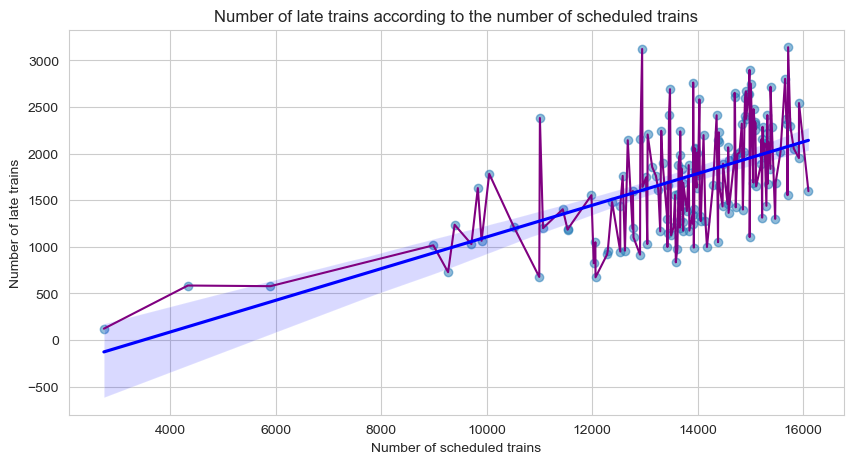

In [50]:
#Linear regression
plt.figure(figsize=(10,5))
plt.plot(df_paca_ord["Nombre de trains programmés"], df_paca_ord["Nombre de trains en retard à l\'arrivée"], color = "purple")
sns.regplot(x=df_paca_ord["Nombre de trains programmés"], y=df_paca_ord["Nombre de trains en retard à l\'arrivée"], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title("Number of late trains according to the number of scheduled trains")
plt.xlabel("Number of scheduled trains")
plt.ylabel("Number of late trains")

Text(0, 0.5, 'Number of late trains')

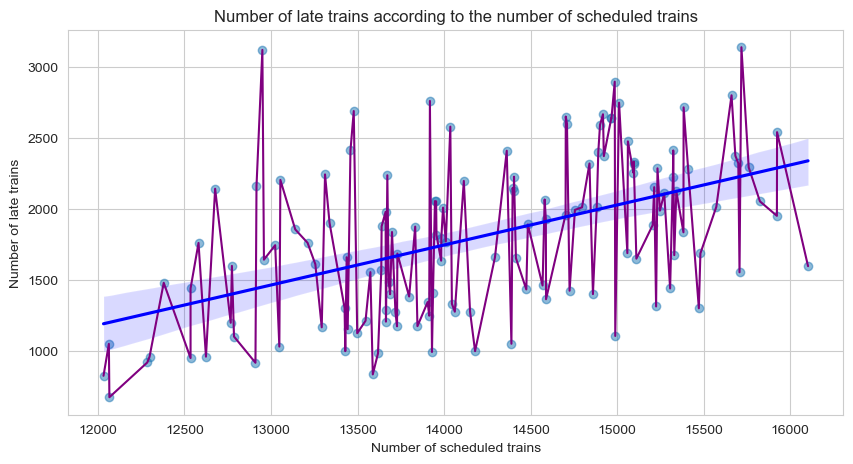

In [51]:
#We should remove extreme values to improve the accuracy of the regression
df_paca_ord_noext = df_paca_ord[df_paca_ord["Nombre de trains programmés"] > 12000]

plt.figure(figsize=(10,5))
plt.plot(df_paca_ord_noext["Nombre de trains programmés"], df_paca_ord_noext["Nombre de trains en retard à l\'arrivée"], color = "purple")
sns.regplot(x=df_paca_ord_noext["Nombre de trains programmés"], y=df_paca_ord_noext["Nombre de trains en retard à l\'arrivée"], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title("Number of late trains according to the number of scheduled trains")
plt.xlabel("Number of scheduled trains")
plt.ylabel("Number of late trains")